# Regression

In [2]:
#Imports
import numpy
import matplotlib
matplotlib.use('agg')
%matplotlib inline
import sys
sys.path.append('../naive_bayes/')
import matplotlib.pyplot as plt
from studentRegression import studentReg
from class_vis import prettyPicture, output_image

from ages_net_worths import ageNetWorthData

In [3]:
#Creating data
ages_train, ages_test, net_worths_train, net_worths_test = ageNetWorthData()

/home/rad/ml_week_py2/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## First Quiz
Create a basic linear regression function

In [4]:
from sklearn.linear_model import LinearRegression
def studentReg(X, Y):
    '''Create a simple LinearRegression from the X & Y'''
    reg = LinearRegression()
    reg.fit(X, Y)
    return reg

In [7]:
reg = studentReg(ages_train, net_worths_train)

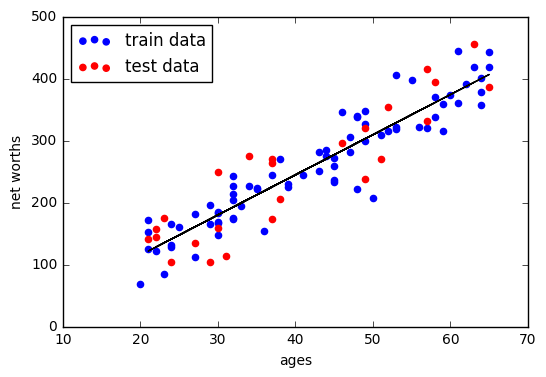

In [8]:
plt.clf()
plt.scatter(ages_train, net_worths_train, color="b", label="train data")
plt.scatter(ages_test, net_worths_test, color="r", label="test data")
plt.plot(ages_test, reg.predict(ages_test), color="black")
plt.legend(loc=2)
plt.xlabel("ages")
plt.ylabel("net worths")
plt.show()

## Second Quiz

In [9]:
### get Katie's net worth (she's 27)
### sklearn predictions are returned in an array, so you'll want to index into
### the output to get what you want, e.g. net_worth = predict([[27]])[0][0] (not
### exact syntax, the point is the [0] at the end). In addition, make sure the
### argument to your prediction function is in the expected format - if you get
### a warning about needing a 2d array for your data, a list of lists will be
### interpreted by sklearn as such (e.g. [[27]]).
km_net_worth = reg.predict([[27]])[0][0] 

### get the slope
### again, you'll get a 2-D array, so stick the [0][0] at the end
slope = reg.coef_[0][0]

### get the intercept
### here you get a 1-D array, so stick [0] on the end to access
### the info we want
intercept = reg.intercept_[0]


### get the score on test data
test_score = reg.score(ages_test, net_worths_test) 

### get the score on the training data
training_score =  reg.score(ages_train, net_worths_train) 

print "Katie's net worth", km_net_worth
print "Slope of the regression", slope
print "Intercept of the regression", intercept
print "R-squared on Test Data", test_score
print "R-squared on Training Data", training_score

Katie's net worth 160.432054531
Slope of the regression 6.47354954958
Intercept of the regression -14.3537833078
R-squared on Test Data 0.812365729231
R-squared on Training Data 0.874588235822


## Mini-project
Predicting bonuses at Enron

In [11]:
# Loading data
import pickle
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("../final_project/final_project_dataset_modified.pkl", "r") )

In [21]:
### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
from sklearn.cross_validation import train_test_split

def split_format_data(features_list):
    data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
    target, features = targetFeatureSplit( data )

    ### training-testing split needed in regression, just like classification
    feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
    return feature_train, feature_test, target_train, target_test

In [13]:
# My regression
reg = studentReg(feature_train, target_train)

In [14]:
def plot_scatter(feature_train, feature_test, target_train, target_test):
    '''Plot scatter of training and test values'''
    train_color = "b"
    test_color = "r"
    for feature, target in zip(feature_test, target_test):
        plt.scatter( feature, target, color=test_color ) 
    for feature, target in zip(feature_train, target_train):
        plt.scatter( feature, target, color=train_color ) 
    ### labels for the legend
    plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
    plt.scatter(feature_train[0], target_train[0], color=train_color, label="train")
    plt.legend()

def plot_regression(reg, features_list):
    try:
        plt.plot( feature_test, reg.predict(feature_test) )
    except NameError:
        pass
    plt.xlabel(features_list[1])
    plt.ylabel(features_list[0])
    plt.legend()
    plt.show()

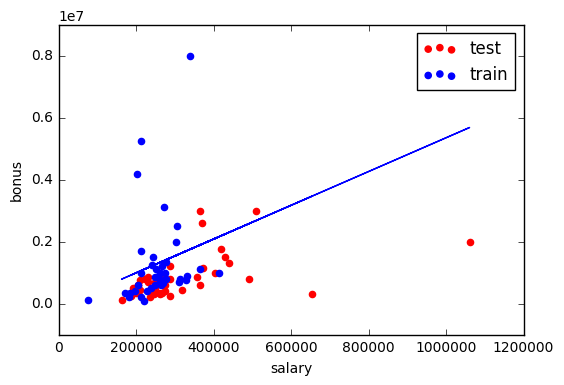

In [15]:
plot_scatter(feature_train, feature_test, target_train, target_test)
plot_regression(reg, features_list)

In [18]:
print "Coefficient", reg.coef_[0]
print "Intercept", reg.intercept_

 Coefficient 5.44814028881
Intercept -102360.543294


In [19]:
print "Training Score", reg.score(feature_train, target_train)

Score 0.0455091926995


In [20]:
print "Test Score", reg.score(feature_test, target_test)

Test Score -1.48499241737


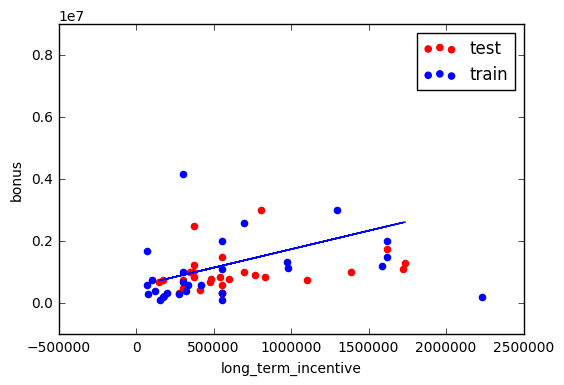

Test Score -0.59271289995


In [22]:
# Regressing bonuses on long_term_incentive
features_list = ['bonus', 'long_term_incentive']
feature_train, feature_test, target_train, target_test = split_format_data(features_list)
reg = studentReg(feature_train, target_train)
plot_scatter(feature_train, feature_test, target_train, target_test)
plot_regression(reg, features_list)
print "Test Score", reg.score(feature_test, target_test)

New regression slope 0.403640645289
New regression score 0.0741662130399


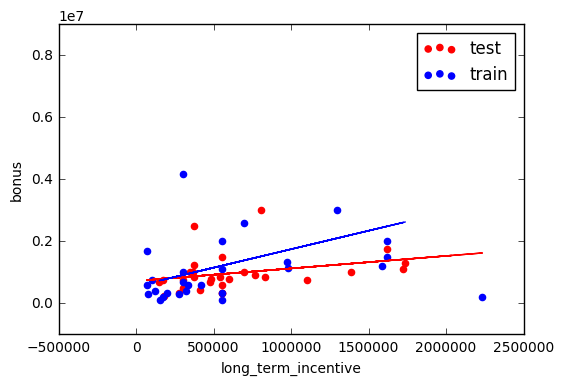

In [23]:
#Mixing train & test data to compare impact of outliers
plot_scatter(feature_train, feature_test, target_train, target_test)
reg.fit(feature_test, target_test)
print "New regression slope", reg.coef_[0]
print "New regression score", reg.score(feature_train, target_train)
plt.plot(feature_train, reg.predict(feature_train),color='r')
reg.fit(feature_train, target_train)
plot_regression(reg, features_list)